In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

try:
    print("File dalam direktori saat ini:", os.listdir('.'))
except FileNotFoundError:
    print("Direktori kerja tidak ditemukan?")

try:
    train_df = pd.read_csv('data/train.csv')
    test_df = pd.read_csv('data/test.csv')
    sample_submission_df = pd.read_csv('data/sample_submission.csv')

    print("\n--- Berhasil Memuat Data ---")
    print(f"Ukuran data Train: {train_df.shape}")
    print(f"Ukuran data Test: {test_df.shape}")
    print(f"Ukuran Sample Submission: {sample_submission_df.shape}")

except FileNotFoundError as e:
    print(f"\nError: Gagal memuat file - {e}")
    print("Pastikan nama file sudah benar dan file ada di direktori yang benar.")
    exit()
except Exception as e:
    print(f"\nError lain saat memuat data: {e}")
    exit()

print("\n--- Format Sample Submission ---")
print("Lima baris pertama Sample Submission:")
print(sample_submission_df.head())

submission_id_col = sample_submission_df.columns[0] 
submission_target_col = sample_submission_df.columns[1]
print(f"Kolom ID di submission: '{submission_id_col}'")
print(f"Kolom Target di submission: '{submission_target_col}'")


print("\n--- Inspeksi Awal Data Train ---")
print("\nLima baris pertama Train:")
print(train_df.head())

print("\nInfo Data Train (Tipe Data & Non-Null):")
train_df.info()

print("\nStatistik Deskriptif Train (Numerik):")
print(train_df.describe())


print("\n--- Inspeksi Awal Data Test ---")
print("\nLima baris pertama Test:")
print(test_df.head())

print("\nInfo Data Test (Tipe Data & Non-Null):")
test_df.info()

print("\nStatistik Deskriptif Test (Numerik):")
print(test_df.describe())


train_cols = set(train_df.columns)
test_cols = set(test_df.columns)

target_variable_name = '???' 

if target_variable_name != '???':
    print(f"\nMemeriksa perbedaan kolom (mengabaikan target '{target_variable_name}'):")
    cols_only_in_train = train_cols - test_cols - {target_variable_name}
    if cols_only_in_train:
        print(f"Kolom hanya di Train (selain target): {cols_only_in_train}")
    else:
        print("Tidak ada kolom unik di Train (selain target).")

    cols_only_in_test = test_cols - train_cols
    if cols_only_in_test:
        print(f"Kolom hanya di Test: {cols_only_in_test}")
    else:
        print("Tidak ada kolom unik di Test.")
else:
    print("\n*** Harap tentukan 'target_variable_name' dalam kode untuk memeriksa perbedaan kolom! ***")

File dalam direktori saat ini: ['main.ipynb', 'data']

--- Berhasil Memuat Data ---
Ukuran data Train: (15321, 53)
Ukuran data Test: (6567, 53)
Ukuran Sample Submission: (6567, 2)

--- Format Sample Submission ---
Lima baris pertama Sample Submission:
   measurement_id  hydrostatic_pressure
0            7102                     0
1           14935                     0
2           16495                     0
3           10942                     0
4           12600                     0
Kolom ID di submission: 'measurement_id'
Kolom Target di submission: 'hydrostatic_pressure'

--- Inspeksi Awal Data Train ---

Lima baris pertama Train:
   measurement_id   depth_reading_time  water_temperature_50m  salinity_50m  \
0           16356  2023-11-13 11:00:00                 304.05          21.7   
1           19332                  NaN                    NaN          20.2   
2            6357  2022-09-22 20:00:00                 297.25          12.4   
3           15781                  NaN 

In [ ]:
target_variable_name = 'hydrostatic_pressure'
train_cols = set(train_df.columns)
test_cols = set(test_df.columns)
print(f"\nMemeriksa perbedaan kolom (mengabaikan target '{target_variable_name}'):")
cols_only_in_train = train_cols - test_cols - {target_variable_name}
cols_only_in_test = test_cols - train_cols
print(f"Kolom hanya di Train (selain target): {cols_only_in_train}")
print(f"Kolom hanya di Test: {cols_only_in_test}")


Memeriksa perbedaan kolom (mengabaikan target 'hydrostatic_pressure'):
Kolom hanya di Train (selain target): set()
Kolom hanya di Test: {'total_light_exposure'}


In [ ]:

col_to_drop_from_test = 'total_light_exposure' 

if col_to_drop_from_test in test_df.columns:
    print(f"\nMenghapus kolom '{col_to_drop_from_test}' dari data Test karena tidak ada di Train.")
    test_df = test_df.drop(columns=[col_to_drop_from_test])
    print(f"Ukuran data Test setelah penghapusan kolom: {test_df.shape}")
else:
    print(f"\nKolom '{col_to_drop_from_test}' tidak ditemukan di Test (mungkin sudah dihapus atau typo).")

train_cols = set(train_df.columns)
test_cols = set(test_df.columns)
target_variable_name = 'hydrostatic_pressure' 

print(f"\nMemeriksa ulang perbedaan kolom setelah koreksi:")
cols_only_in_train = train_cols - test_cols - {target_variable_name}
cols_only_in_test = test_cols - train_cols
print(f"Kolom hanya di Train (selain target): {cols_only_in_train}")
print(f"Kolom hanya di Test: {cols_only_in_test}") 


Menghapus kolom 'total_light_exposure' dari data Test karena tidak ada di Train.
Ukuran data Test setelah penghapusan kolom: (6567, 52)

Memeriksa ulang perbedaan kolom setelah koreksi:
Kolom hanya di Train (selain target): set()
Kolom hanya di Test: set()



--- Analisis Target Variable: hydrostatic_pressure ---

Statistik Deskriptif Target:
count    15321.000000
mean         1.010953
std          0.002010
min          1.004600
25%          1.009600
50%          1.010900
75%          1.012300
max          1.018500
Name: hydrostatic_pressure, dtype: float64


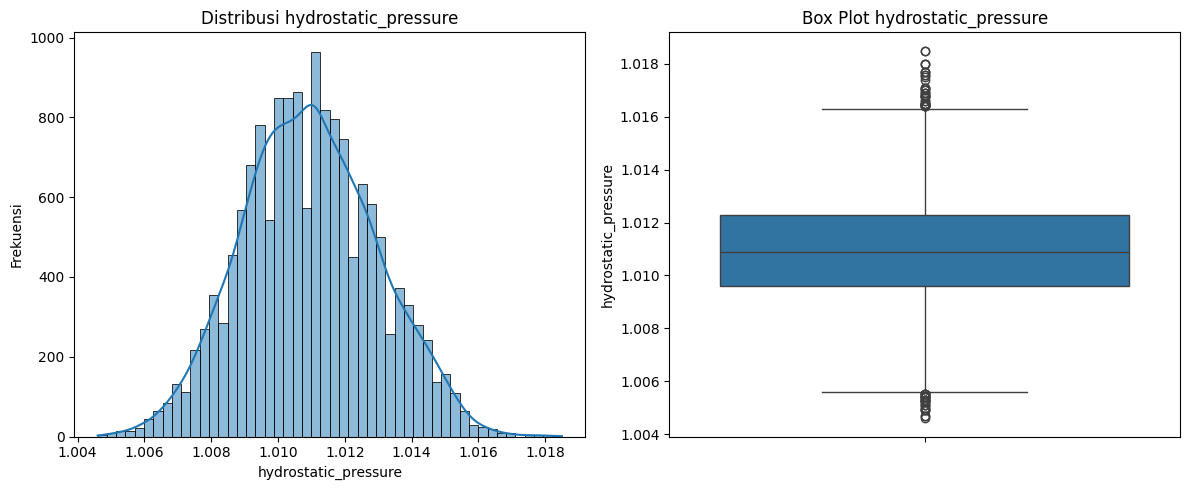


Skewness hydrostatic_pressure: 0.1013
Kurtosis hydrostatic_pressure: -0.2077
Jumlah nilai <= 0 di hydrostatic_pressure: 0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

target = 'hydrostatic_pressure'

print(f"\n--- Analisis Target Variable: {target} ---")

print("\nStatistik Deskriptif Target:")
print(train_df[target].describe())

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(train_df[target], kde=True, bins=50)
plt.title(f'Distribusi {target}')
plt.xlabel(target)
plt.ylabel('Frekuensi')

plt.subplot(1, 2, 2)
sns.boxplot(y=train_df[target])
plt.title(f'Box Plot {target}')
plt.ylabel(target)

plt.tight_layout()
plt.show()

print(f"\nSkewness {target}: {skew(train_df[target]):.4f}")
print(f"Kurtosis {target}: {kurtosis(train_df[target]):.4f}") 

print(f"Jumlah nilai <= 0 di {target}: {(train_df[target] <= 0).sum()}")

In [ ]:
print("\n--- Pembersihan Tipe Data Kolom Object ---")

object_cols = train_df.select_dtypes(include='object').columns.tolist()
time_col = 'depth_reading_time'
if time_col in object_cols:
    object_cols.remove(time_col)

print(f"Kolom Object yang akan diperiksa/dikonversi (selain waktu): {object_cols}")

y_train_full = train_df[target].copy()
train_ids = train_df['measurement_id'].copy()
test_ids = test_df['measurement_id'].copy()

train_features = train_df.drop(columns=[target, 'measurement_id'])
test_features = test_df.drop(columns=['measurement_id']) 

ntrain = train_features.shape[0]
ntest = test_features.shape[0]

all_features = pd.concat((train_features, test_features), ignore_index=True)
print(f"\nUkuran data gabungan untuk preprocessing: {all_features.shape}")

cols_converted = []
cols_failed = []

for col in object_cols:
    try:
        
        if all_features[col].isnull().all():
             print(f"Kolom '{col}' hanya berisi NaN, dilewati.")
             continue
        all_features[col] = all_features[col].str.replace(' ', '', regex=False)
        all_features[col] = all_features[col].str.replace(',', '.', regex=False)
        all_features[col] = pd.to_numeric(all_features[col])
        cols_converted.append(col)
    except Exception as e:
        print(f"Gagal konversi kolom '{col}': {e}")
        cols_failed.append(col)

print(f"\nKolom berhasil dikonversi ke numerik: {cols_converted}")
if cols_failed:
    print(f"Kolom GAGAL dikonversi (perlu investigasi manual!): {cols_failed}")

print("\nInfo data gabungan setelah konversi tipe objek:")
all_features.info()


--- Pembersihan Tipe Data Kolom Object ---
Kolom Object yang akan diperiksa/dikonversi (selain waktu): ['oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition', 'dissolved_gas_pressure', 'current_turbulence', 'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm', 'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm', 'perpendicular_light_intensity', 'thermal_emissions']

Ukuran data gabungan untuk preprocessing: (21888, 51)

Kolom berhasil dikonversi ke numerik: ['oxygen_saturation_50m', 'perceived_water_density', 'sediment_deposition', 'dissolved_gas_pressure', 'current_turbulence', 'sediment_porosity_0_to_10cm', 'sediment_porosity_10_to_30cm', 'sediment_porosity_30_to_100cm', 'sediment_porosity_100_to_250cm', 'perpendicular_light_intensity', 'thermal_emissions']

Info data gabungan setelah konversi tipe objek:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21888 entries, 0 to 21887
Data columns (total 51 columns):
 #   Column                 

In [ ]:
print(f"\n--- Parsing Fitur Waktu: {time_col} ---")

try:
    all_features[time_col] = pd.to_datetime(all_features[time_col])

    all_features['time_year'] = all_features[time_col].dt.year
    all_features['time_month'] = all_features[time_col].dt.month
    all_features['time_day'] = all_features[time_col].dt.day
    all_features['time_dayofweek'] = all_features[time_col].dt.dayofweek 
    all_features['time_dayofyear'] = all_features[time_col].dt.dayofyear
    all_features['time_hour'] = all_features[time_col].dt.hour
    all_features['time_minute'] = all_features[time_col].dt.minute 
    all_features['time_weekofyear'] = all_features[time_col].dt.isocalendar().week.astype(int)

    all_features['time_hour_sin'] = np.sin(2 * np.pi * all_features['time_hour']/24.0)
    all_features['time_hour_cos'] = np.cos(2 * np.pi * all_features['time_hour']/24.0)
    all_features['time_month_sin'] = np.sin(2 * np.pi * all_features['time_month']/12.0)
    all_features['time_month_cos'] = np.cos(2 * np.pi * all_features['time_month']/12.0)
    all_features['time_dayofweek_sin'] = np.sin(2 * np.pi * all_features['time_dayofweek']/7.0)
    all_features['time_dayofweek_cos'] = np.cos(2 * np.pi * all_features['time_dayofweek']/7.0)


    all_features = all_features.drop(columns=[time_col])
    print(f"Kolom '{time_col}' berhasil diparsing dan fitur waktu diekstrak.")
    print(f"Kolom baru terkait waktu: {[col for col in all_features.columns if col.startswith('time_')]}")

except Exception as e:
    print(f"Gagal parsing kolom waktu '{time_col}': {e}")



--- Parsing Fitur Waktu: depth_reading_time ---
Gagal parsing kolom waktu 'depth_reading_time': cannot convert NA to integer



--- Analisis Missing Values ---


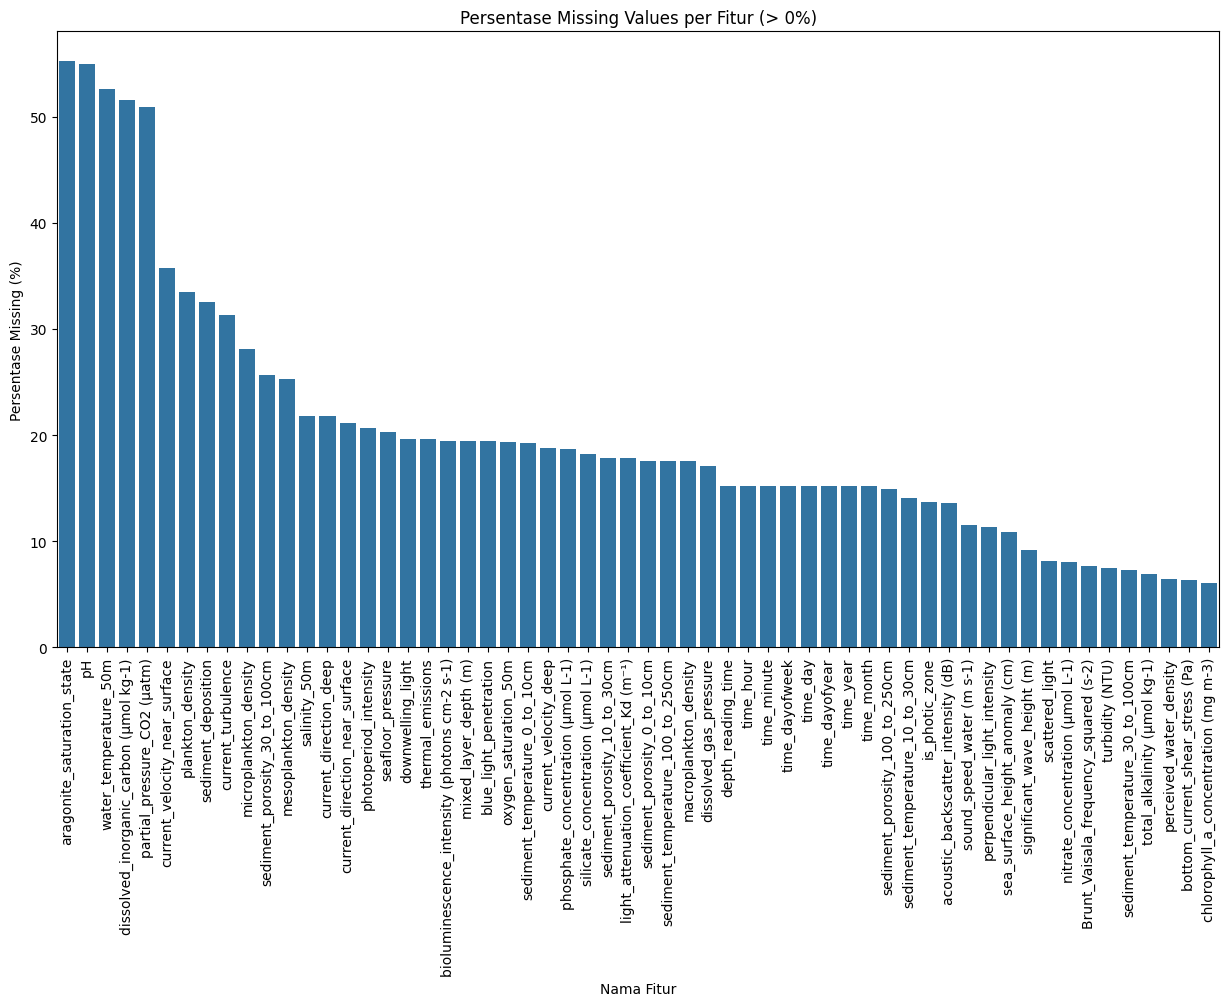


Fitur dengan Missing Values (diurutkan):
aragonite_saturation_state                      55.281433
pH                                              54.966192
water_temperature_50m                           52.599598
dissolved_inorganic_carbon (µmol kg-1)          51.589912
partial_pressure_CO2 (µatm)                     50.904605
current_velocity_near_surface                   35.759320
plankton_density                                33.516082
sediment_deposition                             32.579496
current_turbulence                              31.291118
microplankton_density                           28.106725
sediment_porosity_30_to_100cm                   25.639620
mesoplankton_density                            25.264985
salinity_50m                                    21.829313
current_direction_deep                          21.783626
current_direction_near_surface                  21.102887
photoperiod_intensity                           20.687135
seafloor_pressure             

In [ ]:
print("\n--- Analisis Missing Values ---")

missing_percent = (all_features.isnull().sum() / len(all_features)) * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

if not missing_percent.empty:
    plt.figure(figsize=(15, 8))
    sns.barplot(x=missing_percent.index, y=missing_percent)
    plt.xticks(rotation=90)
    plt.title('Persentase Missing Values per Fitur (> 0%)')
    plt.xlabel('Nama Fitur')
    plt.ylabel('Persentase Missing (%)')
    plt.show()

    print("\nFitur dengan Missing Values (diurutkan):")
    print(missing_percent)

    high_missing_cols = missing_percent[missing_percent > 50].index.tolist()
    if high_missing_cols:
        print(f"\nPERHATIAN: Kolom dengan >50% missing values: {high_missing_cols}")

else:
    print("Tidak ada missing values ditemukan setelah langkah sebelumnya.")


--- Analisis Korelasi Fitur Numerik dengan Target ---

Korelasi Fitur Numerik dengan Target 'hydrostatic_pressure':
hydrostatic_pressure                      1.000000
seafloor_pressure                         0.995046
mixed_layer_depth (m)                     0.340242
nitrate_concentration (µmol L-1)          0.319174
phosphate_concentration (µmol L-1)        0.304428
silicate_concentration (µmol L-1)         0.276927
dissolved_inorganic_carbon (µmol kg-1)    0.247620
time_month                                0.241660
pH                                        0.239781
time_dayofyear                            0.238468
aragonite_saturation_state                0.218566
time_year                                 0.193644
microplankton_density                     0.047487
time_dayofweek                            0.011547
perpendicular_light_intensity             0.006441
Name: hydrostatic_pressure, dtype: float64


water_temperature_50m                    -0.275682
macroplankton_density 

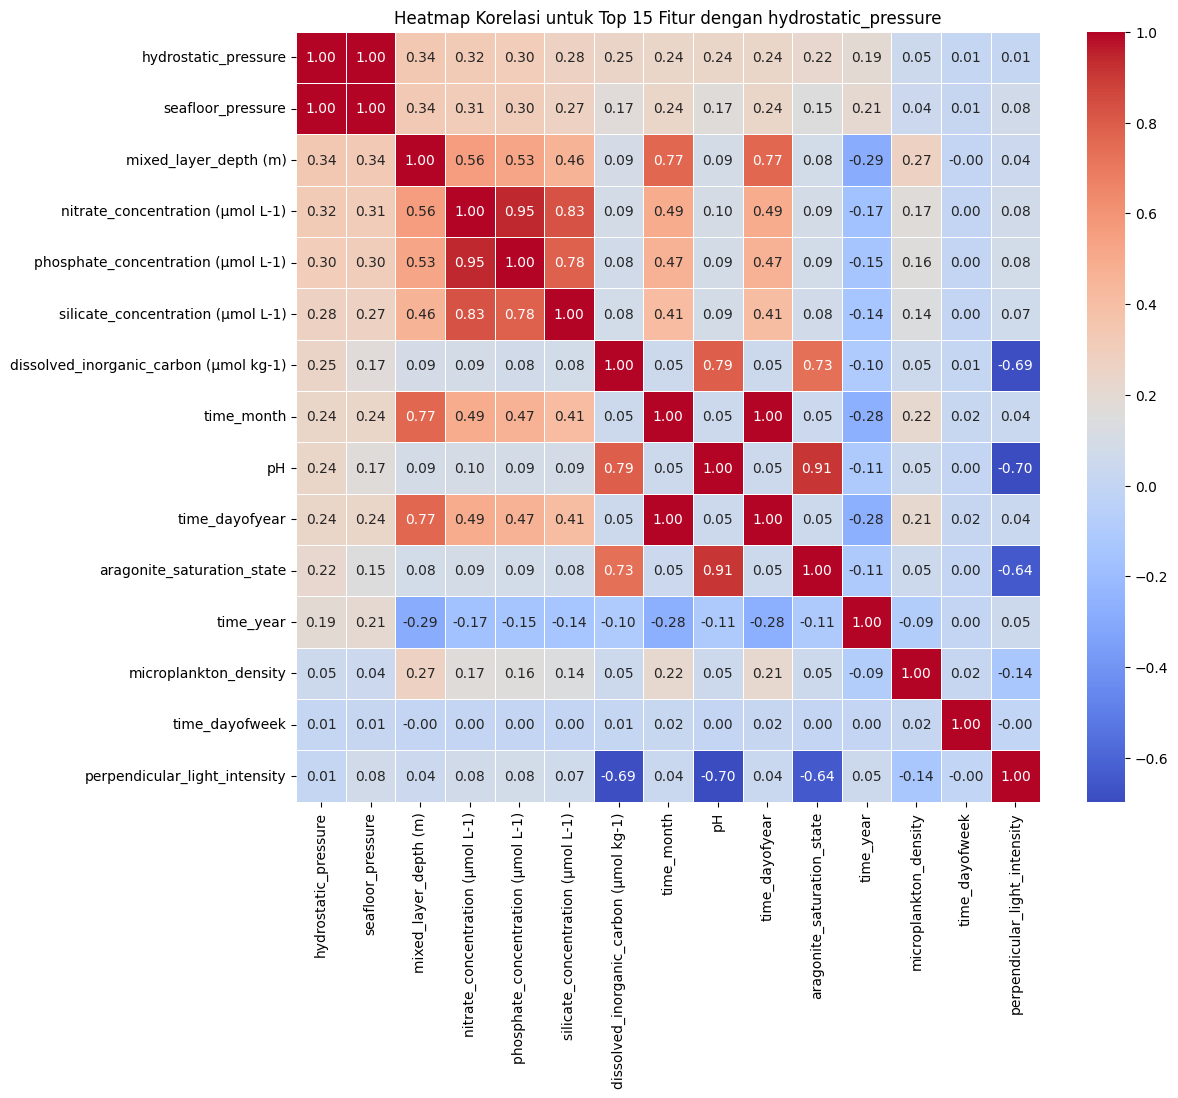

In [ ]:
print("\n--- Analisis Korelasi Fitur Numerik dengan Target ---")

train_features_cleaned = all_features.iloc[:ntrain].copy()


train_for_corr = train_features_cleaned.copy()
train_for_corr[target] = y_train_full.values

numeric_cols = train_for_corr.select_dtypes(include=np.number).columns.tolist()
if target not in numeric_cols:
     print(f"Warning: Target '{target}' tidak terdeteksi sebagai numerik?")
     if target in train_for_corr.columns:
          numeric_cols.append(target)


correlation_matrix = train_for_corr[numeric_cols].corr()

corr_with_target = correlation_matrix[target].sort_values(ascending=False)

print(f"\nKorelasi Fitur Numerik dengan Target '{target}':")
print(corr_with_target.head(15)) 
print(corr_with_target.tail(15)) 

k = 15 
cols_for_heatmap = correlation_matrix.nlargest(k, target)[target].index
cm = np.corrcoef(train_for_corr[cols_for_heatmap].values.T) 

plt.figure(figsize=(12, 10))
sns.heatmap(train_for_corr[cols_for_heatmap].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title(f'Heatmap Korelasi untuk Top {k} Fitur dengan {target}')
plt.show()

In [ ]:
print("\n--- Fase 3: Persiapan Data Final ---")
print(f"Bentuk data gabungan sebelum penghapusan kolom: {all_features.shape}")

cols_to_drop_high_missing = [
    'aragonite_saturation_state',
    'pH',
    'dissolved_inorganic_carbon (µmol kg-1)', 
    'partial_pressure_CO2 (µatm)',
    'water_temperature_50m'
]

existing_cols_to_drop = [col for col in cols_to_drop_high_missing if col in all_features.columns]

if existing_cols_to_drop:
    print(f"\nMenghapus kolom dengan >50% missing values: {existing_cols_to_drop}")
    all_features = all_features.drop(columns=existing_cols_to_drop)
    print(f"Bentuk data gabungan setelah penghapusan kolom missing tinggi: {all_features.shape}")
else:
    print("\nTidak ada kolom dengan missing tinggi untuk dihapus (mungkin nama berbeda atau sudah dihapus).")


--- Fase 3: Persiapan Data Final ---
Bentuk data gabungan sebelum penghapusan kolom: (21888, 58)

Menghapus kolom dengan >50% missing values: ['aragonite_saturation_state', 'pH', 'dissolved_inorganic_carbon (µmol kg-1)', 'partial_pressure_CO2 (µatm)', 'water_temperature_50m']
Bentuk data gabungan setelah penghapusan kolom missing tinggi: (21888, 53)


In [ ]:
if 'measurement_id' in all_features.columns:
    print("\nMenghapus kolom 'measurement_id'...")
    all_features = all_features.drop(columns=['measurement_id'])
    print(f"Bentuk data gabungan setelah penghapusan ID: {all_features.shape}")

In [ ]:
print("\n--- Membagi Kembali Data Menjadi Train & Test Final ---")

train_final = all_features.iloc[:ntrain].copy()
test_final = all_features.iloc[ntrain:].copy()

y_train = y_train_full.copy()

print(f"Bentuk data Train Final (Fitur): {train_final.shape}")
print(f"Bentuk data Test Final (Fitur): {test_final.shape}")
print(f"Bentuk data Target Train (y_train): {y_train.shape}")

assert ntrain == train_final.shape[0] == y_train.shape[0], "Jumlah baris data train tidak cocok!"
assert ntest == test_final.shape[0], "Jumlah baris data test tidak cocok!"

print("\nContoh Train Final:")
print(train_final.head())
print("\nContoh Test Final:")
print(test_final.head())
print("\nContoh Target Train:")
print(y_train.head())


--- Membagi Kembali Data Menjadi Train & Test Final ---
Bentuk data Train Final (Fitur): (15321, 53)
Bentuk data Test Final (Fitur): (6567, 53)
Bentuk data Target Train (y_train): (15321,)

Contoh Train Final:
   depth_reading_time  salinity_50m  oxygen_saturation_50m  \
0 2023-11-13 11:00:00          21.7                   22.6   
1                 NaT          20.2                   22.2   
2 2022-09-22 20:00:00          12.4                    NaN   
3                 NaT          25.6                    NaN   
4 2023-12-11 05:00:00          13.6                   21.5   

   perceived_water_density  sediment_deposition  seafloor_pressure  \
0                     36.7                  NaN                NaN   
1                     33.1                  0.1             0.9883   
2                     29.0                  0.1             0.9879   
3                     36.4                  NaN             0.9886   
4                     27.8                  NaN             0.9862

In [ ]:
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import time 

print("\n--- Fase 4: Modeling & Evaluasi Baseline ---")

N_SPLITS = 5 
RANDOM_SEED = 42

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)

print(f"Menggunakan K-Fold Cross-Validation dengan {N_SPLITS} splits.")


--- Fase 4: Modeling & Evaluasi Baseline ---
Menggunakan K-Fold Cross-Validation dengan 5 splits.


In [ ]:

lgbm_params = {
    'objective': 'regression_l2',
    'metric': 'rmse',             
    'n_estimators': 1000,         
    'learning_rate': 0.05,        
    'feature_fraction': 0.8,      
    'bagging_fraction': 0.8,      
    'bagging_freq': 1,            
    'lambda_l1': 0.1,             
    'lambda_l2': 0.1,             
    'num_leaves': 31,            
    'verbose': -1,                
    'n_jobs': -1,                 
    'seed': RANDOM_SEED,
    'boosting_type': 'gbdt',
}

early_stopping_rounds = 50

print("\nModel baseline: LightGBM")
print("Parameter awal (belum di-tuning):")



Model baseline: LightGBM
Parameter awal (belum di-tuning):


In [ ]:
oof_predictions = np.zeros(train_final.shape[0]) 
test_predictions = np.zeros(test_final.shape[0])  
feature_importance_df = pd.DataFrame()          
fold_scores = []                                
models = []                                     

X = train_final.copy()
y = y_train.copy()
X_test = test_final.copy()

print(f"\nMemulai pelatihan dengan {N_SPLITS}-Fold CV...")
start_time = time.time()


print("\n--- Pemeriksaan Tipe Data Final Sebelum Loop CV ---")

X = train_final.copy()
y = y_train.copy()
X_test = test_final.copy()

datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
if not datetime_cols.empty:
    print(f"INFO: Menghapus kolom datetime lagi: {datetime_cols.tolist()}")
    X = X.drop(columns=datetime_cols)
    X_test = X_test.drop(columns=datetime_cols)

non_numeric_cols = X.select_dtypes(exclude=np.number).columns
if not non_numeric_cols.empty:
    print(f"\nERROR: Ditemukan kolom NON-NUMERIK yang tersisa di data fitur X:")
    print(X[non_numeric_cols].info()) 
    print(f"Menghapus kolom non-numerik ini: {non_numeric_cols.tolist()}")
    X = X.drop(columns=non_numeric_cols)
    if not X_test.empty: 
      cols_to_drop_in_test = [col for col in non_numeric_cols if col in X_test.columns]
      if cols_to_drop_in_test:
        X_test = X_test.drop(columns=cols_to_drop_in_test)

    print("\nVerifikasi tipe data X setelah penghapusan semua non-numerik:")
    print(X.info()) 
else:
    print("\nSemua kolom di X sudah numerik. Melanjutkan...")

oof_predictions = np.zeros(X.shape[0])
test_predictions = np.zeros(X_test.shape[0]) if not X_test.empty else np.array([])
feature_importance_df = pd.DataFrame()
fold_scores = []
models = []

print(f"\nMemulai pelatihan dengan {N_SPLITS}-Fold CV...")
start_time = time.time()

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    model = lgb.LGBMRegressor(**lgbm_params)
    try:
        model.fit(X_train, y_train_fold,
                  eval_set=[(X_val, y_val)],
                  eval_metric='rmse',
                  callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)])

        val_preds = model.predict(X_val)
        oof_predictions[val_index] = val_preds
        fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        fold_scores.append(fold_rmse)
        print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}")

        if not X_test.empty:
            test_preds_fold = model.predict(X_test)
            test_predictions += test_preds_fold / N_SPLITS

        fold_importance_df = pd.DataFrame()
        fold_importance_df["feature"] = X.columns 
        fold_importance_df["importance"] = model.feature_importances_
        fold_importance_df["fold"] = fold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    except Exception as e:
        print(f"Error pada Fold {fold+1}: {e}")   
        print("Periksa tipe data X_train lagi:")
        print(X_train.info())
        break



for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    model = lgb.LGBMRegressor(**lgbm_params)
    model.fit(X_train, y_train_fold,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)]) 

    
    val_preds = model.predict(X_val)
    oof_predictions[val_index] = val_preds

    
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    fold_scores.append(fold_rmse)
    print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}") 

    
    test_preds_fold = model.predict(X_test)
    test_predictions += test_preds_fold / N_SPLITS 

    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

    
mean_cv_rmse = np.mean(fold_scores)
std_cv_rmse = np.std(fold_scores)
total_time = time.time() - start_time

print(f"\n--- Hasil Validasi Silang ---")
print(f"Rata-rata RMSE CV: {mean_cv_rmse:.6f}")
print(f"Std Deviasi RMSE CV: {std_cv_rmse:.6f}")
print(f"Waktu Pelatihan Total: {total_time:.2f} detik")

oof_rmse_total = np.sqrt(mean_squared_error(y, oof_predictions))
print(f"RMSE OOF Keseluruhan: {oof_rmse_total:.6f}")


Memulai pelatihan dengan 5-Fold CV...

--- Pemeriksaan Tipe Data Final Sebelum Loop CV ---
INFO: Menghapus kolom datetime lagi: ['depth_reading_time']

Semua kolom di X sudah numerik. Melanjutkan...

Memulai pelatihan dengan 5-Fold CV...
--- Fold 1/5 ---
Fold 1 RMSE: 0.000592
--- Fold 2/5 ---
Fold 2 RMSE: 0.000613
--- Fold 3/5 ---
Fold 3 RMSE: 0.000589
--- Fold 4/5 ---
Fold 4 RMSE: 0.000599
--- Fold 5/5 ---
Fold 5 RMSE: 0.000598
--- Fold 1/5 ---
Fold 1 RMSE: 0.000592
--- Fold 2/5 ---
Fold 2 RMSE: 0.000613
--- Fold 3/5 ---
Fold 3 RMSE: 0.000589
--- Fold 4/5 ---
Fold 4 RMSE: 0.000599
--- Fold 5/5 ---
Fold 5 RMSE: 0.000598

--- Hasil Validasi Silang ---
Rata-rata RMSE CV: 0.000598
Std Deviasi RMSE CV: 0.000008
Waktu Pelatihan Total: 10.33 detik
RMSE OOF Keseluruhan: 0.000598



--- Analisis Feature Importance ---


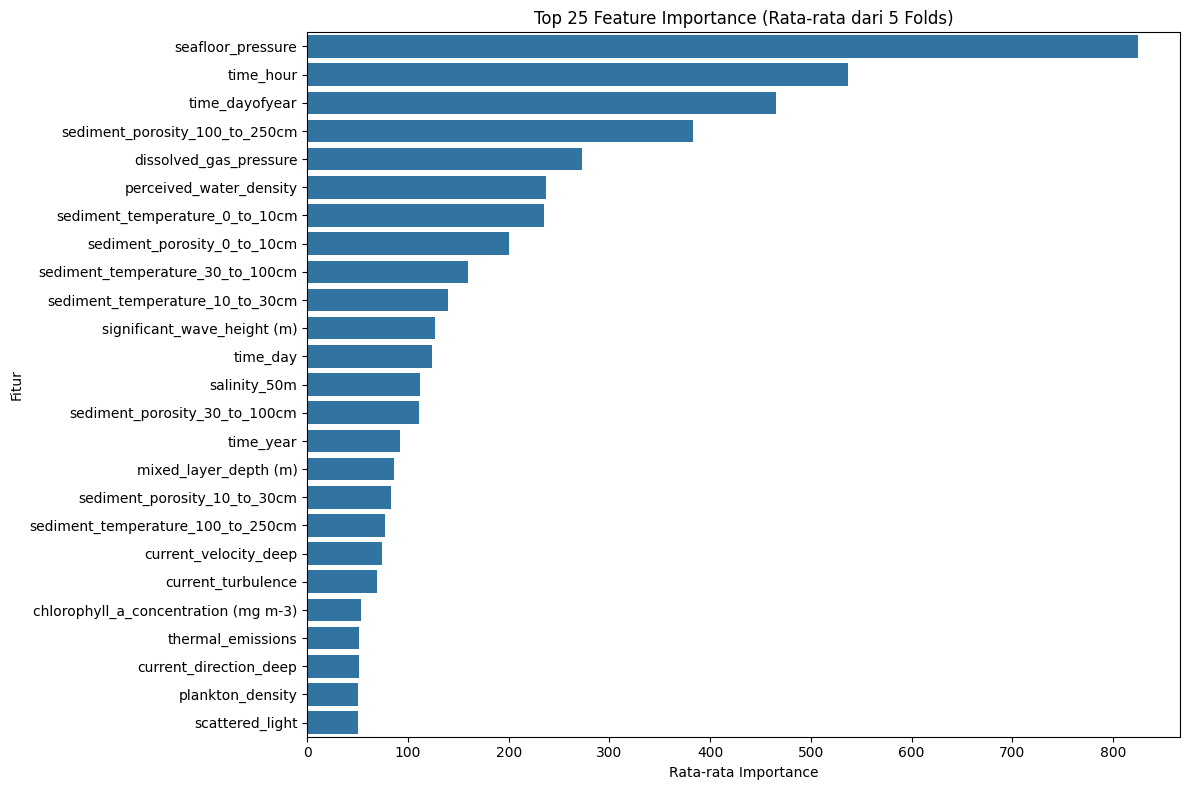


Top 25 Fitur berdasarkan Importance:
feature
seafloor_pressure                       825.2
time_hour                               536.6
time_dayofyear                          465.2
sediment_porosity_100_to_250cm          382.6
dissolved_gas_pressure                  272.4
perceived_water_density                 236.8
sediment_temperature_0_to_10cm          235.6
sediment_porosity_0_to_10cm             200.6
sediment_temperature_30_to_100cm        159.2
sediment_temperature_10_to_30cm         140.0
significant_wave_height (m)             127.4
time_day                                123.8
salinity_50m                            111.6
sediment_porosity_30_to_100cm           110.8
time_year                                92.6
mixed_layer_depth (m)                    86.2
sediment_porosity_10_to_30cm             83.4
sediment_temperature_100_to_250cm        77.6
current_velocity_deep                    74.2
current_turbulence                       69.8
chlorophyll_a_concentration (mg m-

In [ ]:
print("\n--- Analisis Feature Importance ---")

mean_importance = feature_importance_df.groupby("feature")["importance"].mean().sort_values(ascending=False)

N_TOP_FEATURES = 25
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_importance.head(N_TOP_FEATURES).values,
            y=mean_importance.head(N_TOP_FEATURES).index)
plt.title(f'Top {N_TOP_FEATURES} Feature Importance (Rata-rata dari {N_SPLITS} Folds)')
plt.xlabel('Rata-rata Importance')
plt.ylabel('Fitur')
plt.tight_layout()
plt.show()

print(f"\nTop {N_TOP_FEATURES} Fitur berdasarkan Importance:")
print(mean_importance.head(N_TOP_FEATURES))

In [ ]:
import optuna
from sklearn.model_selection import KFold
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import time

print("\n--- Fase 4.1: Hyperparameter Tuning dengan Optuna ---")

if 'X' not in locals() or 'y' not in locals():
     print("Variabel X atau y belum didefinisikan. Jalankan ulang persiapan data.")
     
     X = train_final.copy()
     y = y_train.copy()
     non_numeric_cols = X.select_dtypes(exclude=np.number).columns
     if not non_numeric_cols.empty:
         X = X.drop(columns=non_numeric_cols)


def objective(trial):
    lgbm_params = {
        'objective': 'regression_l2',
        'metric': 'rmse',
        'random_state': RANDOM_SEED, 
        'n_jobs': -1,
        'verbose': -1,
        'boosting_type': 'gbdt',

        'n_estimators': trial.suggest_int('n_estimators', 500, 3000, step=100), 
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True), 
        'num_leaves': trial.suggest_int('num_leaves', 10, 100), 
        'max_depth': trial.suggest_int('max_depth', 3, 12), 
        'feature_fraction': trial.suggest_float('feature_fraction', 0.5, 1.0), 
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.5, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10), 
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True), 
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True), 
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100), 
    }

    kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)
    fold_scores = []
    early_stopping_rounds = 50 

    for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

        model = lgb.LGBMRegressor(**lgbm_params)
        model.fit(X_train, y_train_fold,
                  eval_set=[(X_val, y_val)],
                  eval_metric='rmse',
                  callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)])

        val_preds = model.predict(X_val)
        fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
        fold_scores.append(fold_rmse)

       
        trial.report(fold_rmse, fold)
        if trial.should_prune():
            raise optuna.TrialPruned()

    return np.mean(fold_scores)

N_TRIALS = 50 
STUDY_NAME = 'lgbm_hydrostatic_tuning' 

try:
    study = optuna.load_study(study_name=STUDY_NAME, storage='sqlite:///optuna_studies.db')
    print(f"Memuat studi Optuna yang sudah ada: '{STUDY_NAME}'")
except KeyError:
    print(f"Membuat studi Optuna baru: '{STUDY_NAME}'")
    study = optuna.create_study(direction='minimize',
                                study_name=STUDY_NAME,
                                storage='sqlite:///optuna_studies.db', 
                                load_if_exists=True) 

print(f"Memulai optimasi dengan {N_TRIALS} trials...")
study.optimize(objective, n_trials=N_TRIALS, timeout=600) 

print("\n--- Hasil Tuning Optuna ---")
print(f"Jumlah trials selesai: {len(study.trials)}")
print(f"Trial terbaik:")
best_trial = study.best_trial
print(f"  Value (Min RMSE): {best_trial.value:.6f}")
print(f"  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

best_lgbm_params = lgbm_params.copy() 
best_lgbm_params.update(best_trial.params) 

print("\nParameter LGBM terbaik ditemukan:")


/home/xerces/anaconda3/envs/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



--- Fase 4.1: Hyperparameter Tuning dengan Optuna ---


[I 2025-05-01 21:21:52,480] A new study created in RDB with name: lgbm_hydrostatic_tuning


Membuat studi Optuna baru: 'lgbm_hydrostatic_tuning'
Memulai optimasi dengan 50 trials...


[I 2025-05-01 21:21:57,296] Trial 0 finished with value: 0.0012758195854337532 and parameters: {'n_estimators': 2400, 'learning_rate': 0.05890917511874367, 'num_leaves': 14, 'max_depth': 12, 'feature_fraction': 0.7970930148041662, 'bagging_fraction': 0.7776949010768157, 'bagging_freq': 3, 'lambda_l1': 2.1727285142018764, 'lambda_l2': 0.11030996385940103, 'min_child_samples': 24}. Best is trial 0 with value: 0.0012758195854337532.
[I 2025-05-01 21:22:15,772] Trial 1 finished with value: 0.00048037479890173875 and parameters: {'n_estimators': 900, 'learning_rate': 0.037919218670104365, 'num_leaves': 66, 'max_depth': 11, 'feature_fraction': 0.694464794093465, 'bagging_fraction': 0.7956856627567899, 'bagging_freq': 1, 'lambda_l1': 0.004328572941673288, 'lambda_l2': 4.567418562924747e-05, 'min_child_samples': 22}. Best is trial 1 with value: 0.00048037479890173875.
[I 2025-05-01 21:22:24,677] Trial 2 finished with value: 0.0004955293367553186 and parameters: {'n_estimators': 3000, 'learning


--- Hasil Tuning Optuna ---
Jumlah trials selesai: 32
Trial terbaik:
  Value (Min RMSE): 0.000471
  Params: 
    n_estimators: 900
    learning_rate: 0.047277657792370816
    num_leaves: 91
    max_depth: 6
    feature_fraction: 0.9517086856456513
    bagging_fraction: 0.8225985276787906
    bagging_freq: 5
    lambda_l1: 0.00014056024942992468
    lambda_l2: 0.0010967777466003709
    min_child_samples: 31

Parameter LGBM terbaik ditemukan:


In [ ]:
print("\n--- Fase 4.2: Verifikasi CV dengan Parameter Terbaik ---")


final_lgbm_params = best_lgbm_params.copy()
final_lgbm_params['objective'] = 'regression_l2' 
final_lgbm_params['metric'] = 'rmse'         
final_lgbm_params['verbose'] = -1
final_lgbm_params['n_jobs'] = -1
final_lgbm_params['seed'] = RANDOM_SEED
final_lgbm_params['boosting_type'] = 'gbdt'



oof_predictions_final = np.zeros(X.shape[0])
test_predictions_final = np.zeros(X_test.shape[0]) if not X_test.empty else np.array([])
feature_importance_df_final = pd.DataFrame()
fold_scores_final = []
models_final = [] 

kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_SEED)
early_stopping_rounds = 50 

print(f"Memulai verifikasi dengan {N_SPLITS}-Fold CV menggunakan parameter terbaik...")
start_time_final = time.time()

for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
    print(f"--- Fold {fold+1}/{N_SPLITS} ---")
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train_fold, y_val = y.iloc[train_index], y.iloc[val_index]

    model = lgb.LGBMRegressor(**final_lgbm_params)
    model.fit(X_train, y_train_fold,
              eval_set=[(X_val, y_val)],
              eval_metric='rmse',
              callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds, verbose=False)])

    val_preds = model.predict(X_val)
    oof_predictions_final[val_index] = val_preds
    fold_rmse = np.sqrt(mean_squared_error(y_val, val_preds))
    fold_scores_final.append(fold_rmse)
    print(f"Fold {fold+1} RMSE: {fold_rmse:.6f}")

    if not X_test.empty:
        test_preds_fold = model.predict(X_test)
        test_predictions_final += test_preds_fold / N_SPLITS

    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = X.columns
    fold_importance_df["importance"] = model.feature_importances_
    fold_importance_df["fold"] = fold + 1
    feature_importance_df_final = pd.concat([feature_importance_df_final, fold_importance_df], axis=0)

mean_cv_rmse_final = np.mean(fold_scores_final)
std_cv_rmse_final = np.std(fold_scores_final)
oof_rmse_total_final = np.sqrt(mean_squared_error(y, oof_predictions_final))
total_time_final = time.time() - start_time_final

print(f"\n--- Hasil Verifikasi CV (Parameter Terbaik) ---")
print(f"Rata-rata RMSE CV: {mean_cv_rmse_final:.6f}")
print(f"Std Deviasi RMSE CV: {std_cv_rmse_final:.6f}")
print(f"RMSE OOF Keseluruhan: {oof_rmse_total_final:.6f}")
print(f"Waktu Pelatihan Total: {total_time_final:.2f} detik")



--- Fase 4.2: Verifikasi CV dengan Parameter Terbaik ---
Memulai verifikasi dengan 5-Fold CV menggunakan parameter terbaik...
--- Fold 1/5 ---
Fold 1 RMSE: 0.000472
--- Fold 2/5 ---
Fold 2 RMSE: 0.000477
--- Fold 3/5 ---
Fold 3 RMSE: 0.000455
--- Fold 4/5 ---
Fold 4 RMSE: 0.000472
--- Fold 5/5 ---
Fold 5 RMSE: 0.000479

--- Hasil Verifikasi CV (Parameter Terbaik) ---
Rata-rata RMSE CV: 0.000471
Std Deviasi RMSE CV: 0.000008
RMSE OOF Keseluruhan: 0.000471
Waktu Pelatihan Total: 22.05 detik


In [ ]:
print("\n--- Fase 5: Melatih Model Final & Membuat Submission ---")

final_model = lgb.LGBMRegressor(**final_lgbm_params)

print("Melatih model final pada seluruh data training...")
start_time_final_train = time.time()
final_model.fit(X, y)
end_time_final_train = time.time()
print(f"Pelatihan model final selesai dalam {end_time_final_train - start_time_final_train:.2f} detik.")

print("Membuat prediksi pada data test...")
if not X_test.empty:
    final_test_predictions = final_model.predict(X_test)

    submission_df = pd.DataFrame({
        submission_id_col: test_ids, 
        submission_target_col: final_test_predictions
    })

    submission_filename = 'NDC_RR_blitzZnet.csv'
    submission_df.to_csv(submission_filename, index=False)
    print(f"\nFile submission '{submission_filename}' telah dibuat.")
    print(submission_df.head())

else:
    print("\nData test (X_test) kosong, tidak dapat membuat submission.")


--- Fase 5: Melatih Model Final & Membuat Submission ---
Melatih model final pada seluruh data training...
Pelatihan model final selesai dalam 3.40 detik.
Membuat prediksi pada data test...

File submission 'NDC_RR_blitzZnet.csv' telah dibuat.
   measurement_id  hydrostatic_pressure
0            7102              1.013072
1           14935              1.014785
2           16495              1.012975
3           10942              1.011618
4           12600              1.012330


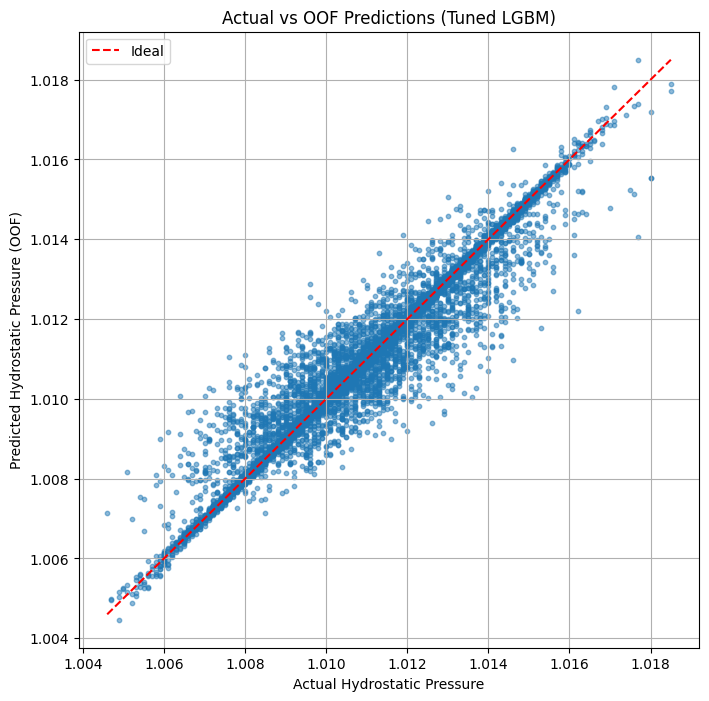

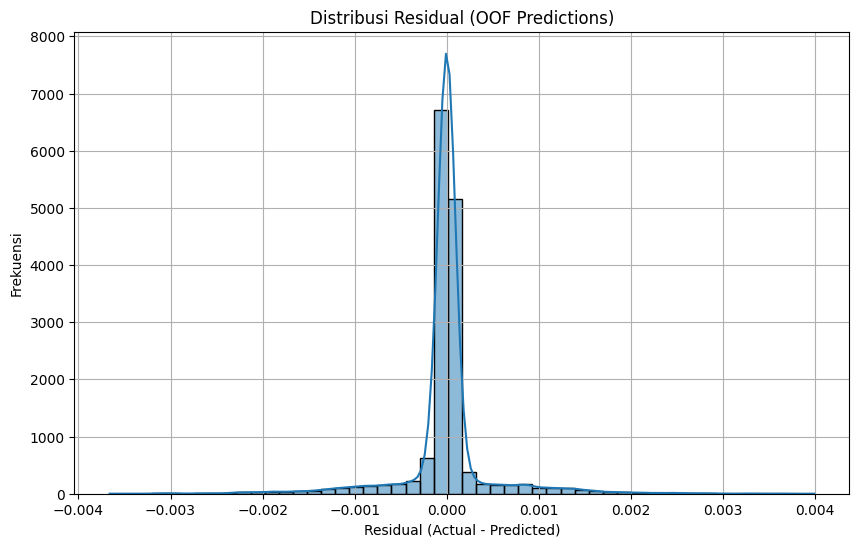

Mean Residual: 0.000001


In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, oof_predictions_final, alpha=0.5, s=10)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], '--', color='red', label='Ideal')
plt.xlabel("Actual Hydrostatic Pressure")
plt.ylabel("Predicted Hydrostatic Pressure (OOF)")
plt.title("Actual vs OOF Predictions (Tuned LGBM)")
plt.grid(True)
plt.legend()
plt.show()

residuals = y_train - oof_predictions_final
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frekuensi")
plt.title("Distribusi Residual (OOF Predictions)")
plt.grid(True)
plt.show()
print(f"Mean Residual: {residuals.mean():.6f}")  